cdflibの説明書
https://cdflib.readthedocs.io/en/latest/introduction.html
akebono cdfについて\
分かったこと\
・Epochはある基準時刻からの経過時間を記録したもの\
　cdflib.cdfepoch.breakdown(epoch, True or False)  #True だとndarray, False だとlistで返す\　
　↑のやつで[year, month, day, hour, minute, socond, milisecond]がたくさん入ったListを作れる\
・E, BはdBで入っていると思われる。(DARTSにあったときはそうだった)\
　The intensities are described in [dB] (0<I<254) where
  0[dB]=10^-6[mV/m] for E-field and 0[dB] = 10^-6[pT] for B-field.\
分からないこと\
・Eaveの平均の仕方は？　Emaxはどの幅の最大？\


In [52]:
import cdflib
cdf_file = cdflib.CDF('ak_h1_mca_19900211_v02.cdf')

In [53]:
cdf_file.cdf_info()

{'CDF': PosixPath('/Document/Akebono_analysis/VLF_mca_cdf/ak_h1_mca_19900211_v02.cdf'),
 'Version': '2.7.2',
 'Encoding': 6,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['Emax', 'Eave', 'Bmax', 'Bave', 'PostGap', 'Epoch', 'channel'],
 'Attributes': [{'Acknowledgement': 'Global'},
  {'ADID_ref': 'Global'},
  {'Data_type': 'Global'},
  {'Data_version': 'Global'},
  {'Descriptor': 'Global'},
  {'Discipline': 'Global'},
  {'Generated_by': 'Global'},
  {'Generation_date': 'Global'},
  {'Instrument_type': 'Global'},
  {'Logical_file_id': 'Global'},
  {'Logical_source': 'Global'},
  {'Logical_source_description': 'Global'},
  {'Mission_group': 'Global'},
  {'MODS': 'Global'},
  {'PI_affiliation': 'Global'},
  {'PI_name': 'Global'},
  {'Project': 'Global'},
  {'Rules_of_use': 'Global'},
  {'source_name': 'Global'},
  {'TEXT': 'Global'},
  {'Time_resolution': 'Global'},
  {'TITLE': 'Global'},
  {'Start_time': 'Global'},
  {'End_time': 'Global'},
  {'AVG_TYPE': 'Variable'},
  {'C

In [54]:
cdf_file.globalattsget()

{'Acknowledgement': 'AKEBONO VLF-MCA data were provided by Akebono VLF team through the data archive system at Kanazawa University in Japan.',
 'ADID_ref': 'NSSD0241 ',
 'Data_type': 'H1 > High Resolution data',
 'Data_version': '2',
 'Descriptor': 'MCA > multi channel analyzer',
 'Discipline': 'Space Physics > Magnetospheric Science',
 'Generated_by': 'KANAZAWA University',
 'Generation_date': '20140529',
 'Instrument_type': 'Radio and Plasma Waves(space)',
 'Logical_file_id': 'AK_H1_MCA_19900211_V02',
 'Logical_source': 'AK_H1_MCA',
 'Logical_source_description': 'Akebono Radio and Plasma Waves High Resolution data',
 'Mission_group': 'Akebono',
 'MODS': ' ',
 'PI_affiliation': 'KANAZAWA University',
 'PI_name': 'I. Nagano',
 'Project': ' ',
 'Rules_of_use': ' In order to confirm the reliability of the data, you are requested to contact the VLF PI, Prof. Isamu Nagano before using the VLF-MCA data in oral/poster presentations. In the publishment, you should contact to the VLF PI and c

In [12]:
#実時間に直す部分
epoch = cdf_file.varget('Epoch')
test_breakdown = cdflib.cdfepoch.breakdown(epoch,False)

for i in range(len(test_breakdown)):
    del test_breakdown[i][0:3]
    test_breakdown[i].pop()
    test_breakdown[i] = " ".join(map(str, test_breakdown[i]))
test_breakdown[0:10]

['0 0 4',
 '0 0 12',
 '0 0 20',
 '0 0 28',
 '0 0 36',
 '0 0 44',
 '0 0 52',
 '0 1 0',
 '0 1 8',
 '0 1 16']

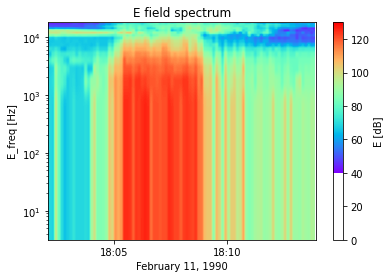

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import Normalize 
from datetime import datetime

start_time, end_time = [18, 2, 0], [18, 14, 0] # hour, minute, second

start_time, end_time = (3600*start_time[0] + 60*start_time[1] + start_time[2])//8, (3600*end_time[0] + 60*end_time[1] + end_time[2])//8

test_breakdown = cdflib.cdfepoch.breakdown(epoch,False) #list

Intensity_of_Eave = cdf_file.varget('Eave')[start_time:end_time]
Intensity_of_Eave = np.fliplr(Intensity_of_Eave)

for i in range(len(test_breakdown)):
    test_breakdown[i].pop()
    test_breakdown[i] = "/".join(map(str, test_breakdown[i]))
test_breakdown = [datetime.strptime(x, '%Y/%m/%d/%H/%M/%S') for x in test_breakdown]

x_lims = mdates.date2num(test_breakdown)[start_time:end_time]#list の要素を datetime to num

y_lims = cdf_file.varget('channel').tolist()

fig, ax = plt.subplots()
mappable = ax.imshow(Intensity_of_Eave.T, extent = [x_lims[0], x_lims[-1],  y_lims[0], y_lims[-1]], aspect='auto', cmap = 'rainbow', norm = Normalize(vmin = 40, vmax = 130))
ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.set_title('E field spectrum')
ax.set_xlabel('February 11, 1990')
ax.set_ylabel('E_freq [Hz]')
ax.set_yscale('log')
pp = fig.colorbar(mappable, label = 'E [dB]')
pp.ax.set_ylim(0, 130)
plt.show()

In [59]:
y_lims[-1]

17800.0

In [44]:
Intensity_of_Eave = cdf_file.varget('Eave')
Intensity_of_Eave[4000:4003], np.fliplr(Intensity_of_Eave[4000:4003]), Intensity_of_Eave[4000:4003].T

(array([[113, 100,  87,  79,  74,  67,  64,  61,  61,  67,  62,  51,  39,
          43,  51,  41],
        [ 73,  97,  85,  85,  77,  74,  69,  65,  62,  66,  62,  48,  42,
          42,  49,  39],
        [111, 105,  99, 105, 100,  94,  89,  80,  71,  69,  66,  50,  42,
          44,  52,  40]], dtype=uint8),
 array([[ 41,  51,  43,  39,  51,  62,  67,  61,  61,  64,  67,  74,  79,
          87, 100, 113],
        [ 39,  49,  42,  42,  48,  62,  66,  62,  65,  69,  74,  77,  85,
          85,  97,  73],
        [ 40,  52,  44,  42,  50,  66,  69,  71,  80,  89,  94, 100, 105,
          99, 105, 111]], dtype=uint8),
 array([[113,  73, 111],
        [100,  97, 105],
        [ 87,  85,  99],
        [ 79,  85, 105],
        [ 74,  77, 100],
        [ 67,  74,  94],
        [ 64,  69,  89],
        [ 61,  65,  80],
        [ 61,  62,  71],
        [ 67,  66,  69],
        [ 62,  62,  66],
        [ 51,  48,  50],
        [ 39,  42,  42],
        [ 43,  42,  44],
        [ 51,  49,  52],
 

In [92]:
cdf_file.varget("channel"), str(3.16e+00)

(array([3.16e+00, 5.62e+00, 1.00e+01, 1.78e+01, 3.16e+01, 5.62e+01,
        1.00e+02, 1.78e+02, 3.16e+02, 5.62e+02, 1.00e+03, 1.78e+03,
        3.16e+03, 5.62e+03, 1.00e+04, 1.78e+04], dtype=float32),
 '3.16')

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

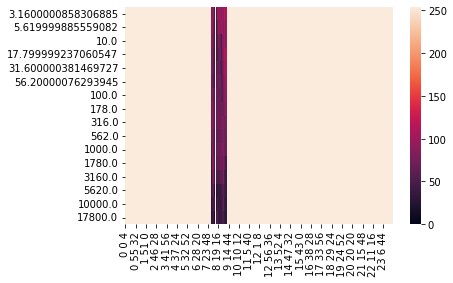

In [5]:
Intensity_of_Eave = cdf_file.varget('Eave') #単位はdB
freq = cdf_file.varget('channel')
time = cdf_file.varget('Epoch')
time = cdflib.cdfepoch.breakdown(time, False) #Falseなのでlist が返される

#timeのyear, month, day, msの部分を削る
year, month, day = str(time[1][0]), str(time[1][1]), str(time[1][2])
for i in range(len(time)):
    del time[i][0:3]
    time[i].pop()
    time[i] = " ".join(map(str, time[i]))



7